In [1]:
import pandas as pd
import jsonlines

In [7]:
df_llama3_8b_en_fc3 = pd.read_json('C:/Users/dilee/Desktop/seminar/llama3-basque-3FC/samples_bertaqa_en_2025-03-14T02-39-13.626435.jsonl',lines=True)
df_llama3_8b_eu_fc3 = pd.read_json('C:/Users/dilee/Desktop/seminar/llama3-basque-3FC/samples_bertaqa_eu_2025-03-14T02-31-35.206411.jsonl',lines=True)

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Create a dictionary to map Basque group names to English
group_translation = {
    "Euskara eta literatura": "Basque Language and Literature",
    "Geografia eta Historia": "Geography and History",
    "Gizartea eta ohiturak": "Society and Traditions",
    "Kirola eta aisialdia": "Sports and Leisure",
    "Kultura eta artea": "Culture and Art",
    "Musika eta dantza": "Music and Dance",
    "Zientzia eta teknologia": "Science and Technology",
    "Zinema eta ikuskizunak": "Cinema and Shows",
    "Gai orokorrak": "General Topics",
    "Euskal gaiak": "Basque Issues"
}

# Function to translate Basque groups to English
def translate_group(group_name):
    return group_translation.get(group_name, group_name)

In [17]:
def plot_eus_en_size2(df_llama3_8b_en_fc3,df_llama3_8b_eu_fc3):
    merged = pd.DataFrame()


    merged["D=EN Llama3-8B-fc3"] = df_llama3_8b_en_fc3["acc"]
    merged["D=EU Llama3-8B-fc3"] = df_llama3_8b_eu_fc3["acc"]

    # Ensure to only compute mean on numeric columns (e.g., accuracy)
    merged_numeric = merged.select_dtypes(include=['float64', 'int64'])
    # plot average accuracy per model
    merged_mean = merged_numeric.mean()
    merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
    display(pd.DataFrame((merged_mean* 100).round(2)))

    #merged["group"] = df_llama3_8b_en_fc1["doc"].apply(lambda x: x["group"] if x["group"] != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["group"] = df_llama3_8b_eu_fc3["doc"].apply(lambda x: translate_group(x["group"]) if x["group"] != "Nazioarteko gaiak" else "General Topics")
    merged["difficulty"] = df_llama3_8b_eu_fc3["doc"].apply(lambda x: x["difficulty"])
    merged["category"] = df_llama3_8b_eu_fc3["doc"].apply(lambda x: translate_group(x["category"]))

    merged_grouped = merged.groupby("group").mean(numeric_only=True)
    merged_grouped_difficulty = merged.groupby("difficulty").mean(numeric_only=True)
    merged_grouped_category = merged.groupby("category").mean(numeric_only=True)
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # multiply by 100 and round to 1 decimal place
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    
    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean(numeric_only=True)
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    # merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)
    display((merged_group_category.T * 100).round(2))
    
    # add plot that combines group and difficulty
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean(numeric_only=True)
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")

,0
D=EN Llama3-8B-fc3,61.80
D=EU Llama3-8B-fc3,50.61


group,Basque Issues,General Topics
D=EN Llama3-8B-fc3,47.72,75.71
D=EU Llama3-8B-fc3,40.95,60.16


difficulty,1,2,3
D=EN Llama3-8B-fc3,68.45,61.57,53.70
D=EU Llama3-8B-fc3,54.86,50.78,45.03


category,Basque Language and Literature,Cinema and Shows,Culture and Art,Geography and History,Music and Dance,Science and Technology,Society and Traditions,Sports and Leisure
D=EN Llama3-8B-fc3,59.02,61.81,62.65,66.17,52.29,67.52,64.57,60.43
D=EU Llama3-8B-fc3,52.20,51.59,52.32,54.83,44.48,52.55,50.60,46.24


category           Basque Language and Literature                 \
group                               Basque Issues General Topics   
D=EN Llama3-8B-fc3                          50.49          67.42   
D=EU Llama3-8B-fc3                          47.54          56.77   

category           Cinema and Shows                Culture and Art  \
group                 Basque Issues General Topics   Basque Issues   
D=EN Llama3-8B-fc3            44.30          79.26            46.1   
D=EU Llama3-8B-fc3            37.58          65.55            40.0   

category                          Geography and History                 \
group              General Topics         Basque Issues General Topics   
D=EN Llama3-8B-fc3          79.72                 51.67          80.67   
D=EU Llama3-8B-fc3          65.03                 41.67          68.00   

category           Music and Dance                Science and Technology  \
group                Basque Issues General Topics          Basque Issues   
D=EN Llama3-8B-fc3           39.10          65.00                  56.85   
D=EU Llama3-8B-fc3           36.33          52.33                  42.47   

category                          Society and Traditions                 \
group              General Topics          Basque Issues General Topics   
D=EN Llama3-8B-fc3          78.04                  48.10          80.54   
D=EU Llama3-8B-fc3          62.50                  41.52          59.40   

category           Sports and Leisure                 
group                   Basque Issues General Topics  
D=EN Llama3-8B-fc3              44.93          75.58  
D=EU Llama3-8B-fc3              40.20          52.15

difficulty                     1                            2                 \
group              Basque Issues General Topics Basque Issues General Topics   
D=EN Llama3-8B-fc3         53.29          83.39         47.50          75.40   
D=EU Llama3-8B-fc3         44.44          65.14         41.68          59.73   

difficulty                     3                 
group              Basque Issues General Topics  
D=EN Llama3-8B-fc3         41.02          66.37  
D=EU Llama3-8B-fc3         35.63          54.41

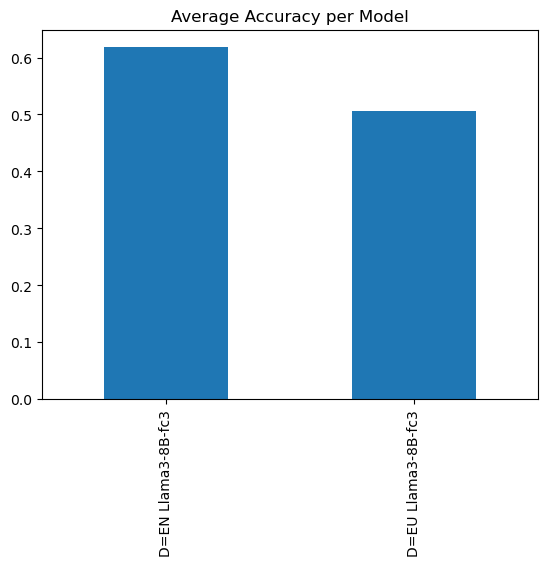

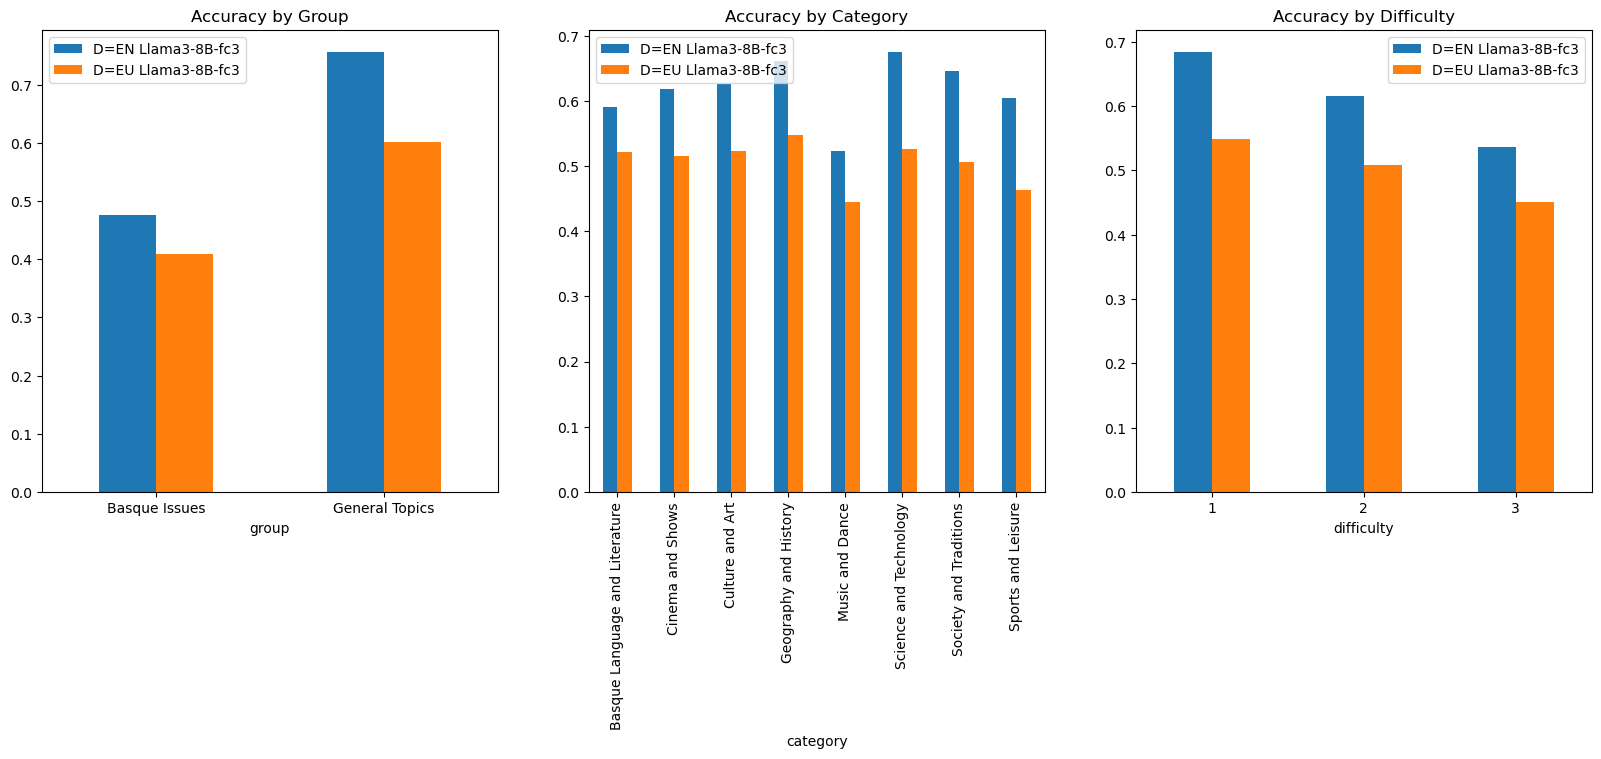

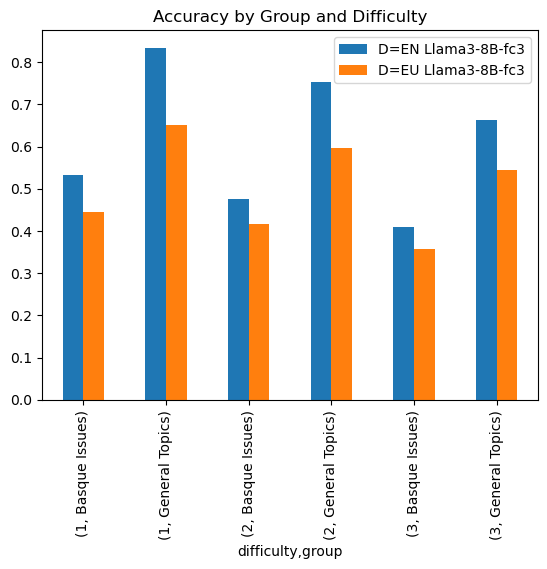

In [18]:
plot_eus_en_size2(df_llama3_8b_en_fc3,df_llama3_8b_eu_fc3)